<a href="https://colab.research.google.com/github/akibmir90/Machine-Learning-Deep-Learning/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SuperStore
#### This is a sample superstore dataset, where we will perform exploratory data analysis to deliver insights on how the company can increase its profits while minimizing the losses.

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Import

In [3]:
dataset = pd.read_csv('/content/SampleSuperstore.csv')

Check the dataset variables 

In [4]:
dataset.head(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310


Get the summary of the Dataset

In [63]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Here we can see categorical variables are not included in the summary statistics

Let us see if there are any missing values in the dataset

In [7]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We have no missing values

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Correlation Heatmap

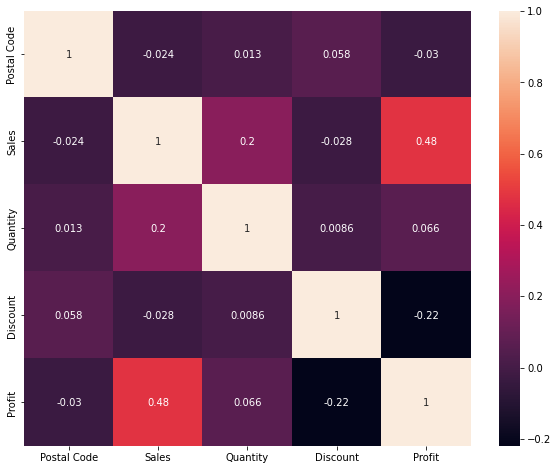

In [65]:
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True)

From above correlation matrix,, it is clear that Sales and Profit have a nice positive correlation where as Discount can be seen having negative correlation.

We will check the count of Sales in different regions

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


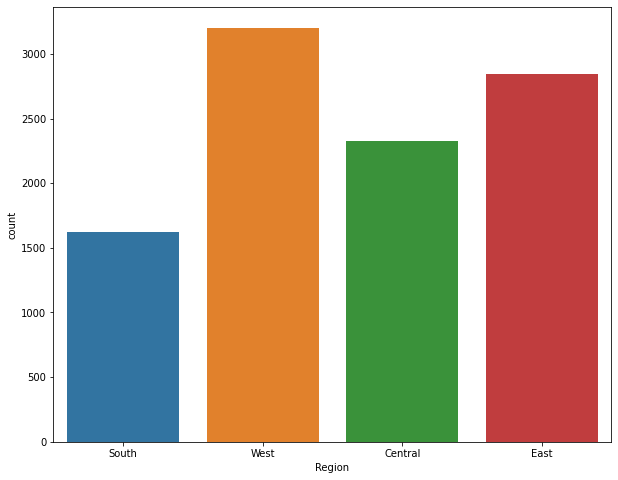

In [9]:
plt.figure(figsize = (10,8))
sns.countplot(dataset['Region'])

So it can be seen that "West" region has the highest count nd South has the lowest

Also see which Segment is contibuting more in the Sales and Profit of the Company 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


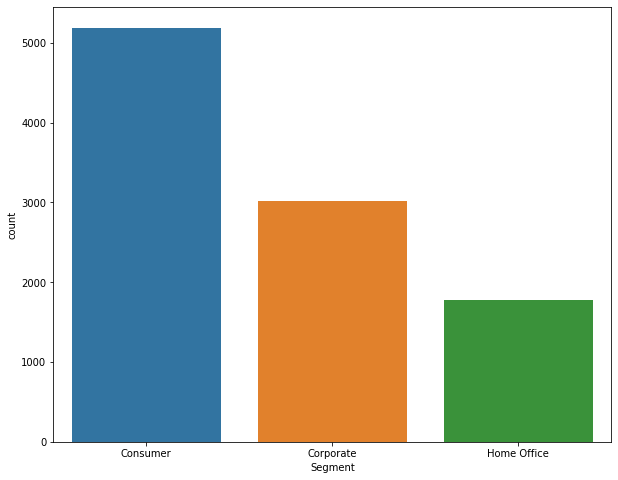

In [60]:
plt.figure(figsize = (10,8))
sns.countplot(dataset['Segment'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


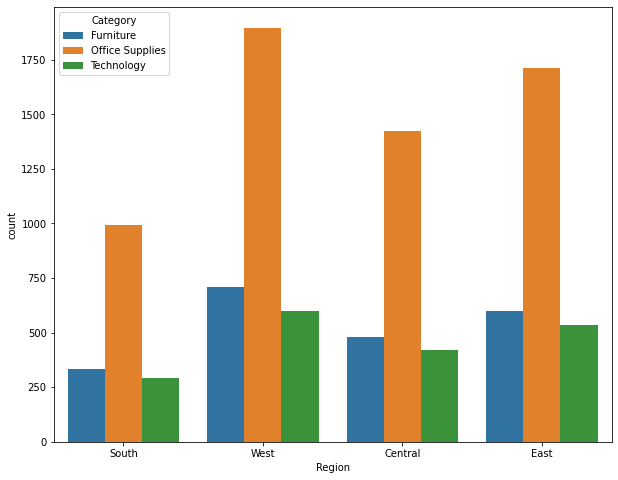

In [10]:
plt.figure(figsize = (10,8))
sns.countplot(dataset['Region'],data = dataset, hue = 'Category')

With respect to the category grouped by different regions, Office supplies are having highest quantity sales beacuse of its cheap price and 'West' region is dominating over all other regions.

The scatterplot between Sales and Profit with respect to the Category is indicating that 'Technology' is having the maximum sales and Profit with more Profit than Furniture and Office Supplies

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


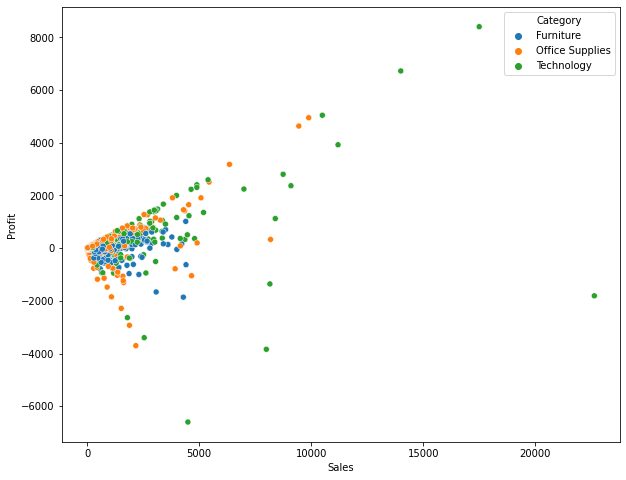

In [11]:
plt.figure(figsize = (10,8))
sns.scatterplot(dataset['Sales'],dataset['Profit'], data = dataset, hue = 'Category')

We can also analyze the quantitative figures for above plot as:

In [67]:
df = pd.DataFrame(dataset.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
df

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


Which Sub-Category is Best-Selling and Profitable

In [71]:
df1 = pd.DataFrame(dataset.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
df1

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


Sorting the above dataframe in descending order

In [73]:

subcat = pd.DataFrame(df1.sort_values('Sales', ascending = False))
subcat

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


Phones are having the maximum sales

Sort the dataframe for Profit

In [76]:
subcat_pr = pd.DataFrame(df1.sort_values('Profit', ascending = False))
subcat_pr


,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


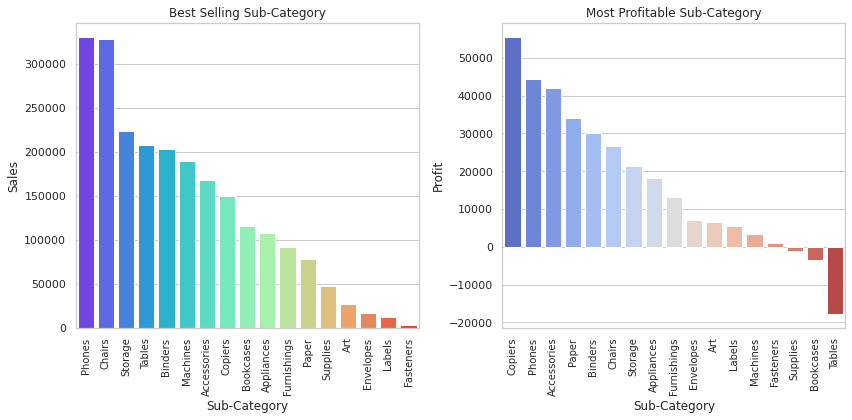

In [77]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
subcat1 = sns.barplot(data = subcat, x = subcat.index, y = subcat.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_pr, x = subcat_pr.index, y = subcat_pr.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

With respect to Profit, Copiers are having the maximum Profit among all other sub-categories

Which Segment is More Profitable

In [81]:
df2 = pd.DataFrame(dataset.groupby(['Segment'])[['Profit']].sum())
df2

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


Consumer Segment is having the maximum Profit

Best Method of Shipping Mode

Standard Class is the prefered mode of shipping

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


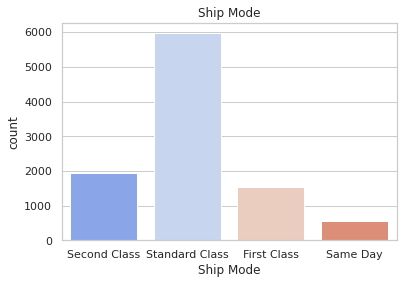

In [84]:
sns.countplot(dataset['Ship Mode'], palette = "coolwarm")
plt.title("Ship Mode")
plt.show()

Most Profitable Region

In [86]:
df3 =  pd.DataFrame(dataset.groupby(['Region'])[['Profit']].sum())
df3

,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


Central Region is most profitable

Sales from different Cities

In [90]:
city_sales = pd.DataFrame(dataset.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
city_sales

<ipython-input-90-09cb01577b9a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales = pd.DataFrame(dataset.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256368.161,3417
Los Angeles,175851.341,2879
Seattle,119540.742,1590
San Francisco,112669.092,1935
Philadelphia,109077.013,1981
...,...,...
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1


New York with the highest Sales and Abilene with lowest

# Recommendation

Category 'Technology' is most profiatble and best selling and 'Phones' being the most profitable in sub-category. Target them

Supplies, Bookcases anD Tables are contributing highly to the losses. So these could either be removed or improved

Consumer and Corporate Segment are contributing most and these should be targetted most

Among the Cities, New York is the main area which should be focussed most with supplies and improvements in the Product Sector

# THANK YOU